In [1]:
using Plots

In [2]:
import LowLevelFEM as FEM
using LowLevelFEM
using SparseArrays

gmsh.initialize()

In [3]:
#gmsh.open("wave_in_rectangle.geo")
gmsh.open("wave_in_rectangle_2.geo")

Info    : Reading 'wave_in_rectangle_2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 50%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 80%] Meshing curve 6 (Line)
Info    : [ 90%] Meshing curve 7 (Line)
Info    : Done meshing 1D (Wall 0.0005953s, CPU 0.000566s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00757612s, CPU 0.0056s)
Info    : 40401 nodes 40807 elements
Info    : Done reading 'wave_in_rectangle_2.geo'


In [4]:
mat = FEM.material("body", E=2.e5, ν=0.3, ρ=7.85e-9)
problem = FEM.Problem([mat], type="PlaneStress")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 401)


LowLevelFEM.Problem("wave_in_rectangle_2", "PlaneStress", 2, [("body", 200000.0, 0.3, 7.85e-9)], 1.0, 40401)

In [5]:
supp1 = FEM.displacementConstraint("left", ux=0)
supp2 = FEM.displacementConstraint("middle", uy=0)
load = FEM.load("source", fx=-1);

In [6]:
dof = problem.non * problem.dim
u0 = zeros(dof)
v0 = zeros(dof);

In [7]:
K = FEM.stiffnessMatrix(problem)
M = FEM.massMatrix(problem)
f = FEM.loadVector(problem, [load])
C = spzeros(dof, dof)
dof

80802

In [8]:
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp1, supp2]);

In [9]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

2.964524311460143e-7

In [10]:
u1, v1, t1 = FEM.CDM(K, M, C, f, u0, v0, 2Tₘᵢₙ, Tₘᵢₙ / π)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 9.436373961699586e-8, 1.8872747923399172e-7, 2.830912188509876e-7, 3.7745495846798345e-7, 4.718186980849793e-7, 5.661824377019752e-7])

In [11]:
sts = length(t1)
u0 = u1[:, sts]
v0 = v1[:, sts]

f .*= 0
u2, v2, t2 = FEM.CDM(K, M, C, f, u0, v0, Tₘᵢₙ, 5Tₘᵢₙ / π)

([0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0])

In [12]:
gmsh.option.setNumber("General.Trackball", 0)
gmsh.option.setNumber("General.RotationX", 298)
gmsh.option.setNumber("General.RotationY", 346)
gmsh.option.setNumber("General.RotationZ", 332)

In [13]:
vvec1 = FEM.showDoFResults(problem, v1, t=t1, "vvec", name="v1(t)", visible=false)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$vvec1].NormalRaise", 5)
gmsh.option.setNumber("View[$vvec1].VectorType", 5)
gmsh.option.setNumber("View[$vvec1].IntervalsType", 3)
gmsh.option.setNumber("View[$vvec1].NbIso", 20)

In [14]:
vvec2 = FEM.showDoFResults(problem, v2, t=t2, "vvec", name="v2(t)", visible=true)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$vvec2].NormalRaise", 5)
gmsh.option.setNumber("View[$vvec2].VectorType", 5)
gmsh.option.setNumber("View[$vvec2].IntervalsType", 3)
gmsh.option.setNumber("View[$vvec2].NbIso", 20)

In [15]:
S2 = FEM.solveStress(problem, u2)

LowLevelFEM.StressField([[0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;]  …  [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;], [0.0; 0.0; … ; 0.0; 0.0;;]], [808, 809, 810, 811, 812, 813, 814, 815, 816, 817  …  40798, 40799, 40800, 40801, 40802, 40803, 40804, 40805, 40806, 40807], 1)

In [16]:
s2 = FEM.showStressResults(problem, S2, "seqv", name="σ(t)", t=t2, visible=false, smooth=true)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$s2].NormalRaise", 100)
#gmsh.option.setNumber("View[$s2].VectorType", 5)
gmsh.option.setNumber("View[$s2].IntervalsType", 3)
gmsh.option.setNumber("View[$s2].NbIso", 20)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


In [17]:
#seqv = FEM.showStressResults(problem, S2, "seqv", name="σeqv(t)", t=t2, visible=false, smooth=true)
#gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
#gmsh.option.setNumber("View[$seqv].NormalRaise", 100)
##gmsh.option.setNumber("View[$seqv].VectorType", 5)
#gmsh.option.setNumber("View[$seqv].IntervalsType", 3)
#gmsh.option.setNumber("View[$seqv].NbIso", 20)

In [18]:
ph, x, y = FEM.plotOnPath(problem, "path", s2, 500, step=100, plot=true)
#ph = FEM.plotOnPath(problem, "path", s2, 500, step=1, plot=false)

┌ Warning: plotOnPath: step is greater than max. number of steps (max. number is chosen)  100 <==> 1!
└ @ LowLevelFEM /home/perebal/Dokumentumok/GitHub/LowLevelFEM.jl/src/LowLevelFEM.jl:1308


(4, [0.0, 0.20040080160320642, 0.40080160320641284, 0.6012024048096193, 0.8016032064128257, 1.0020040080160322, 1.2024048096192386, 1.402805611222445, 1.6032064128256514, 1.8036072144288577  …  98.19639278557115, 98.39679358717436, 98.59719438877755, 98.79759519038076, 98.99799599198397, 99.19839679358718, 99.39879759519039, 99.5991983967936, 99.79959919839679, 100.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.7991015358532716, 0.896191639600991, 0.9880265892127791, 1.0742813236080766, 1.1605360580033743, 1.1083376756533554, 1.0547407769725772, 1.048094705875738, 1.0893479639301789, 1.1306012219846229])

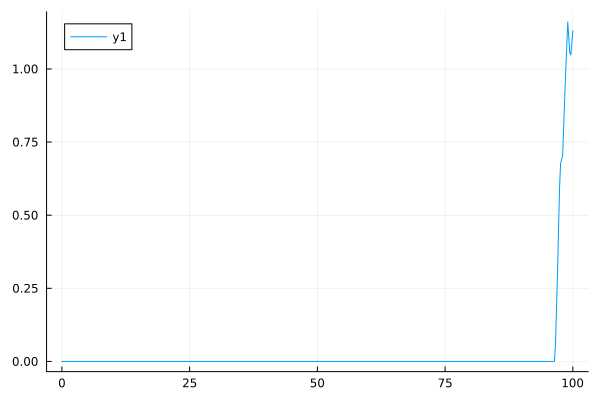

In [19]:
plot(x, y)

In [20]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.12.2
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.6.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XOpenIM() failed
XRequest.18: BadValue 0x0


In [21]:
dataType, tags, data, time, numComponents = gmsh.view.getModelData(s2, 0)

("NodeData", UInt64[0x0000000000000001, 0x0000000000000002, 0x0000000000000003, 0x0000000000000004, 0x0000000000000005, 0x0000000000000006, 0x0000000000000007, 0x0000000000000008, 0x0000000000000009, 0x000000000000000a  …  0x0000000000009dc8, 0x0000000000009dc9, 0x0000000000009dca, 0x0000000000009dcb, 0x0000000000009dcc, 0x0000000000009dcd, 0x0000000000009dce, 0x0000000000009dcf, 0x0000000000009dd0, 0x0000000000009dd1], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]  …  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], 0.0, 1)

In [22]:
gmsh.finalize()

In [23]:
function vec_test(a; b=false)
    if b == true
        b = [i for i in 1:a]
        return a, b
    else
        return a
    end
end

vec_test(3, b=true)

(3, [1, 2, 3])